## Basic computer vision analysis with nueral network using Keras and Tensorflow
***
In this notebook some of the basic commands for creating a convolutional neural network (CNN) model using Keras for solving computer vision problems is demonstarted
1. Creating a CNN model for handwritten digit recognition using MNIST dataset
    - Import MNIST dataset
    - Explore and clean data
    - Create CNN model
    - Train the model
    - Evaluate model accuracy
    - Save model and parameters
    - Load and evaluate saved model
2. Object detection and classification with ResNet: import pretrained NN model ResNet-50 and evaluate its performance
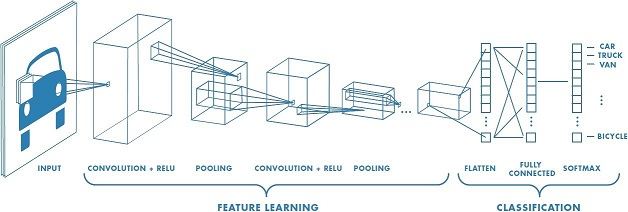

### Import libraries

In [1]:
import keras
import tensorflow
from keras.models import Sequential    # Sequential model is a linear stack of layers
from keras.utils import np_utils       # Utilities for array and list manipulation

print(keras.__version__)               # print keras version

Using TensorFlow backend.


2.3.1


### 1.a. Import MNIST handwritten digit database
MNIST database contains 60,000 training handwritten digits (0 to 9) images and 10,000 testing images

In [2]:
from keras.datasets import mnist
import matplotlib.pyplot as plt

### 1.b. Explore and clean data and divide into train and test sets

<class 'numpy.ndarray'>
(60000, 28, 28)


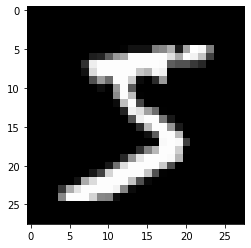

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()    # load data
print(type(X_train))
print(X_train.shape)
plt.imshow(X_train[0], cmap = 'gray')                                      # plot the first image in training data set
plt.show()

In [4]:
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)   # reshape dataset to format required by keras
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)      # reshape dataset to format required by keras

print(X_train.shape)
# CNN input is a tensor with shape (number of images) x (image depth) x (image width) x (image height)

(60000, 1, 28, 28)


In [5]:
X_train = X_train.astype('float32')                     # change data type
X_test = X_test.astype('float32')                       # change data type
X_train /= 255                                          # scale data between 0 to 1
X_test /= 255                                           # scale data between 0 to 1

Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

print(type(y_train))
print(y_train.shape)
print(y_train[:10])

<class 'numpy.ndarray'>
(60000,)
[5 0 4 1 9 2 1 3 1 4]


### 1.c. Create CNN model
Similar to a NN, CNN is composed of multiple layers which each perform different tasks (convolution layers 1-4 perform feature extraction, and conventional NN layers (5-7) perform classification task:
1. Conv2D: Layer's parameters consist of a set of filters/kernels which perform image feature extraction. CNN automatically finds appropriate kernels during training process
2. Relu: Activation function which introduces nonlinearlity to the model (replaces negative values by zero)
3. Maxpool: Reduce the dimensions of the data by downsampling, combining the outputs of neurons at one layer into a single neuron in the next layer (eg max value)
4. Dropout: Reduce overfitting by removing individual layers randomly during model training
5. Flatten: Transform 2D array into 1D array
6. Fully connected (Dense): a conventional NN layer which transforms a flattened layer into another layer
7. Softmax: outputs a probability distribution where the values of the outputs sum to 1

In [6]:
from keras import Sequential as seq
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Activation
from keras.layers import Flatten

model = seq()                                                                             # create a sequential model
model.add(Conv2D(32, (3, 3), padding="same", activation="relu", input_shape=(1,28,28)))   # add a convolution layer to model
model.add(Conv2D(32, (3, 3), padding="same", activation="relu"))                          # add a convolution layer to model
model.add(MaxPooling2D(pool_size=(2, 2), data_format = "channels_first"))                 # add a maxpooling layer to model
model.add(Dropout(0.25))                                                                  # add a dropout layer to model
model.add(Flatten())                                                                      # flatten layers
model.add(Dense(128, activation='relu'))                                                  # add a Dense layer to model
model.add(Dropout(0.5))                                                                   # add a dropout layer to model
model.add(Dense(10, activation='softmax'))                                                # add a dense layer to model

model.output_shape
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 1, 28, 32)         8096      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 1, 28, 32)         9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 1, 14, 16)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 14, 16)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 224)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               28800     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)              

### 1.d. Train model

In [8]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])   # choose model training config
model.fit(X_train, Y_train, batch_size=32, epochs=10)                                    # Train the model

Epoch 1/10
60000/60000 [==============================] - 23s 385us/step - loss: 0.4304 - accuracy: 0.8647
Epoch 2/10
60000/60000 [==============================] - 22s 366us/step - loss: 0.1860 - accuracy: 0.9452
Epoch 3/10
60000/60000 [==============================] - 22s 366us/step - loss: 0.1527 - accuracy: 0.9539
Epoch 4/10
60000/60000 [==============================] - 22s 365us/step - loss: 0.1273 - accuracy: 0.9626
Epoch 5/10
60000/60000 [==============================] - 22s 366us/step - loss: 0.1179 - accuracy: 0.9647
Epoch 6/10
60000/60000 [==============================] - 22s 370us/step - loss: 0.1077 - accuracy: 0.9678
Epoch 7/10
60000/60000 [==============================] - 24s 395us/step - loss: 0.1000 - accuracy: 0.9700
Epoch 8/10
60000/60000 [==============================] - 23s 389us/step - loss: 0.0942 - accuracy: 0.9722
Epoch 9/10
60000/60000 [==============================] - 23s 375us/step - loss: 0.0903 - accuracy: 0.9730
Epoch 10/10
60000/60000 [============

### 1.e. Evaluate model accuracy

In [9]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Model accuracy = ',score[1])

Model accuracy =  0.9868999719619751


### 1.f. Save trained model and parameters

In [10]:
model_json = model.to_json()
with open("./models/model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("./models/weights.h5")
print("Saved model and weights to disk")

Saved model and weights to disk


### 1.g. Load saved model

In [11]:
from keras.models import model_from_json

# load json and create model
json_file = open('./models/model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# load weights into new model
loaded_model.load_weights("./models/weights.h5")
print("Loaded model from disk")

Loaded model from disk


### Evaluate loaded model accuracy

In [12]:
# evaluate loaded model on test data
loaded_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
score = loaded_model.evaluate(X_test, Y_test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

accuracy: 98.69%


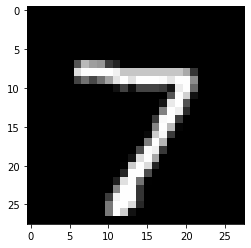

Prediction =  [7]


In [13]:
# prediction
Xnew = X_test[0]
Xnew = Xnew[0][:][:]
plt.imshow(Xnew, cmap = 'gray')
plt.show()

Xnew = X_test[0]
Xnew = Xnew.reshape(Xnew.shape[0], 1, 28, 28)
ynew = loaded_model.predict_classes(Xnew)
print("Prediction = ", ynew)

***
## 2. Object classification with ResNet
ResNet-50 is a pretrained  neural network model trained on more than a million images from the ImageNet database. The network is 50 layers deep and can classify images into 1000 object categories.

In [14]:
# Import libraries
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

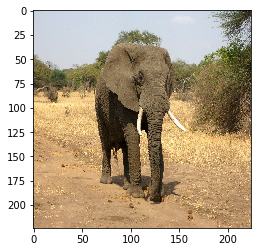

In [15]:
model = ResNet50(weights='imagenet')                     # pre-trained weights using ImageNet data

# input shape has to be (224, 224, 3)

img_path = './images/elephant.jpg'
img = image.load_img(img_path, target_size=(224, 224))   # load an image into PIL format
x = image.img_to_array(img)                              # converts a PIL Image instance to a Numpy array
x = np.expand_dims(x, axis=0)                            # expands the array by inserting a new axis
x = preprocess_input(x)                                  # rearrange the image to the format the model requires

plt.imshow(img, cmap = 'gray')
plt.show()

In [16]:
preds = model.predict(x)                                 # use the model to classify image
print('Predicted:', decode_predictions(preds, top=3)[0]) # results format (class, description, probability)

Predicted: [('n02504458', 'African_elephant', 0.80690306), ('n01871265', 'tusker', 0.18222994), ('n02504013', 'Indian_elephant', 0.010860167)]


### Read more on this [link](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Keras_Cheat_Sheet_Python.pdf)